**Matt Bass**

Spring 2021

CS 251: Data Analysis and Visualization

Project 4: Principal Component Analysis

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import pca_cov

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

## Notes

In your implementations, only the following "high level" `scipy`/`numpy` functions can be used:

- `np.linalg.eig`

**NOTE:** The numpy functions that you have been using so far are fine to use.

## Task 1: Principal component analysis using the covariance matrix

In this task, you will implement principal component analysis (PCA) using the covariance matrix method, test your code, plot the results on the Iris dataset, then run PCA and analyze on several other datasets

### 1a) Import Iris data

- In the below cell, load in the Iris dataset into a pandas DataFrame (note, this version of iris does not have the data type row — going forward, csv files we work with won't have this `type` row).
- Print out the head (only showing the first 5 data samples).
- Create an `PCA_COV` object called `pca` based on the DataFrame object that you just created.

In [2]:
iris_data = pd.read_csv('data/iris.csv')
pca = pca_cov.PCA_COV(iris_data)
iris_data.head()


,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Your code should print something that looks like this (with fancier formatting):

    sepalLength	sepalWidth	petalLength	petalWidth	species
    0	5.1	3.5	1.4	0.2	0
    1	4.9	3.0	1.4	0.2	0
    2	4.7	3.2	1.3	0.2	0
    3	4.6	3.1	1.5	0.2	0
    4	5.0	3.6	1.4	0.2	0


### 1b) Implement PCA

Implement and test the following methods necessary to perform PCA in `pca_cov.py`.

- `covariance_matrix`: Computes the covariance matrix of data
- `compute_prop_var`: Computes the proportion variance accounted for by the principal components (PCs).
- `compute_cum_var`: Computes the *cumulative* proportion variance accounted for by the PCs.
- `pca`: Method to perform PCA on the data
- `elbow_plot` (**answer Question 1**)
- `pca_project`: Project the data into PCA space

#### (i) Test `covariance_matrix`

In [3]:
# Test covariance here
np.random.seed(0)
d = np.random.randn(100, 3)
cov_mat = pca.covariance_matrix(d)
print(f'Your covariance matrix has shape {cov_mat.shape} and should be (3, 3)')
print(f'Your covariance matrix is:\n{cov_mat} and should be\n[[ 1.06338 -0.07562  0.11267]\n [-0.07562  0.97412 -0.0222 ]\n [ 0.11267 -0.0222   0.96217]]')

Your covariance matrix has shape (3, 3) and should be (3, 3)
Your covariance matrix is:
[[ 1.06338 -0.07562  0.11267]
 [-0.07562  0.97412 -0.0222 ]
 [ 0.11267 -0.0222   0.96217]] and should be
[[ 1.06338 -0.07562  0.11267]
 [-0.07562  0.97412 -0.0222 ]
 [ 0.11267 -0.0222   0.96217]]


#### (ii) Test `prop_var`

Takes eigenvalues ordered large-to-small and computes the proportion of the total variance account for by the $k^{th}$ principal component.

In [4]:
# Test prop_var here
np.random.seed(0)
test_evals = np.sort(np.random.uniform(size=(10,)))[::-1]
prop_var = pca.compute_prop_var(test_evals)
print(f'Your list is actually a Python list (as it should be)? {isinstance(prop_var, list)}')
print(f'Your proportion variance list length is {len(prop_var)} and should be 10')
print(f'Your proportion variance list begins with\n{prop_var[:2]} and it should be\n[0.15649813681155653, 0.1448232917174111]')

Your list is actually a Python list (as it should be)? True
Your proportion variance list length is 10 and should be 10
Your proportion variance list begins with
[0.15649813681155653, 0.1448232917174111] and it should be
[0.15649813681155653, 0.1448232917174111]


#### (iii) Test `compute_cum_var`

Takes proportion variance for principal components, ordered large-to-small, and computes the cumulative sum (cumulative variance accounted for by the first $k$ principal components).

In [5]:
# Test accum_var here
np.random.seed(0)
test_evals = np.sort(np.random.uniform(size=(10,)))[::-1]
prop_var = pca.compute_prop_var(test_evals)
accum_var = pca.compute_cum_var(prop_var)
print(f'Your list is actually a Python list (as it should be)? {isinstance(accum_var, list)}')
print(f'Your cumulative variance list length is {len(accum_var)} and should be 10')
print(f'Your cumulative variance list begins with\n{accum_var[:2]} and should be\n[0.15649813681155653, 0.3013214285289676]')

Your list is actually a Python list (as it should be)? True
Your cumulative variance list length is 10 and should be 10
Your cumulative variance list begins with
[0.15649813681155653, 0.3013214285289676] and should be
[0.15649813681155653, 0.3013214285289676]


#### (iv) Test `pca`

Performs PCA using the covariance matrix method.

In [6]:
# Test pca (no normalization) here
iris_headers = list(iris_data.columns[:-1])
pca.pca(iris_headers)

# test that instance variable shape are correct
print(f'There are {len(pca.vars)} vars in Iris PCA and there should be 4.')
print(f'The original PCA data has shape {pca.A.shape} and should be (150, 4).')
print(f'Eigenvector shape: {pca.e_vecs.shape} should be (4, 4).\nEigenvalue shape: {pca.e_vals.shape} should be (4,).')
print(f'Length of proportion variance account for: {len(pca.get_prop_var())} should be 4.')
print(f'Length of cumulative proportion variance account for: {len(pca.get_cum_var())} should be 4.')
print()

# Test values
print(f"Your vars in Iris PCA:\n{pca.vars}  and they should be\n['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']")
print(f'Your eigenvectors:\n{pca.e_vecs}. They should be\n[[ 0.36139 -0.65659 -0.58203  0.31549]\n [-0.08452 -0.73016  0.59791 -0.31972].\n [ 0.85667  0.17337  0.07624 -0.47984]\n[ 0.35829  0.07548  0.54583  0.75366]].')
print(f'Your eigenvalues:\n{pca.e_vals}. They should be\n[4.22824 0.24267 0.07821 0.02384]')
print(f'Cumulative proportion variance account for:\n{pca.get_cum_var()}. It should be\n[0.924618723201727, 0.9776852063187949, 0.9947878161267245, 0.9999999999999999] .')



There are 4 vars in Iris PCA and there should be 4.
The original PCA data has shape (150, 4) and should be (150, 4).
Eigenvector shape: (4, 4) should be (4, 4).
Eigenvalue shape: (4,) should be (4,).
Length of proportion variance account for: 4 should be 4.
Length of cumulative proportion variance account for: 4 should be 4.

Your vars in Iris PCA:
['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']  and they should be
['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']
Your eigenvectors:
[[ 0.36139 -0.65659 -0.58203  0.31549]
 [-0.08452 -0.73016  0.59791 -0.31972]
 [ 0.85667  0.17337  0.07624 -0.47984]
 [ 0.35829  0.07548  0.54583  0.75366]]. They should be
[[ 0.36139 -0.65659 -0.58203  0.31549]
 [-0.08452 -0.73016  0.59791 -0.31972].
 [ 0.85667  0.17337  0.07624 -0.47984]
[ 0.35829  0.07548  0.54583  0.75366]].
Your eigenvalues:
[4.22824 0.24267 0.07821 0.02384]. They should be
[4.22824 0.24267 0.07821 0.02384]
Cumulative proportion variance account for:
[0.924618723201

In [7]:
# Test pca (normalization) here
iris_headers = list(iris_data.columns[:-1])
pca.pca(iris_headers, normalize=True)

# test that instance variable shape are correct
print(f'There are {len(pca.vars)} vars in Iris PCA and there should be 4.')
print(f'The original PCA data has shape {pca.A.shape} and should be (150, 4).')
print(f'Eigenvector shape: {pca.e_vecs.shape} should be (4, 4).\nEigenvalue shape: {pca.e_vals.shape} should be (4,).')
print(f'Length of proportion variance account for: {len(pca.get_prop_var())} should be 4.')
print(f'Length of cumulative proportion variance account for: {len(pca.get_cum_var())} should be 4.')
print(f'Data min/max is {pca.A.min()}/{pca.A.max()} should be 0.0/1.0')
print()

# Some test values
print(f'Your eigenvalues:\n{pca.e_vals}. They should be\n[0.23245 0.03247 0.0096  0.00176].')
print(f'Cumulative proportion variance account for:\n{pca.get_cum_var()}. It should be\n[0.8413603821315434, 0.9588784639918418, 0.9936140780797744, 1.0].')

There are 4 vars in Iris PCA and there should be 4.
The original PCA data has shape (150, 4) and should be (150, 4).
Eigenvector shape: (4, 4) should be (4, 4).
Eigenvalue shape: (4,) should be (4,).
Length of proportion variance account for: 4 should be 4.
Length of cumulative proportion variance account for: 4 should be 4.
Data min/max is 0.0/1.0 should be 0.0/1.0

Your eigenvalues:
[0.23245 0.03247 0.0096  0.00176]. They should be
[0.23245 0.03247 0.0096  0.00176].
Cumulative proportion variance account for:
[0.8413603821315434, 0.9588784639918418, 0.9936140780797744, 1.0]. It should be
[0.8413603821315434, 0.9588784639918418, 0.9936140780797744, 1.0].


#### (v) Test `elbow_plot`

Visualize the cumulative proportion variance accounted for by the first $k$ principal components.

**Make sure that you have the normalized PCA in memory before proceeding (the last cell of test code above)**

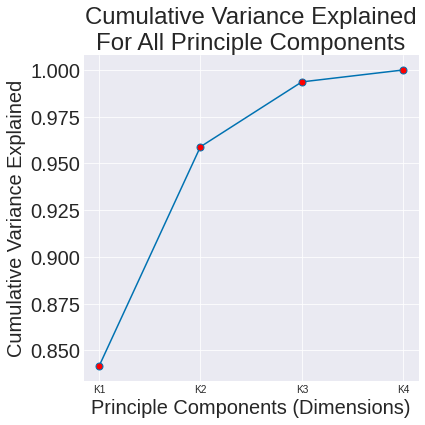

In [8]:
# test elbow plot
pca.elbow_plot(figsize=(6,6))
plt.show()

**Question 1:** Based on the Iris elbow plot, how many principle components would you drop. Why?


**Question 1 answer:**

I would drop the last 2 principle components (K3 and K3) because the first two (K1 and K2) account for about 96% of the
variance in the Iris data set.

#### (vi) Test `pca_project`

Project the data onto a list of the top $2$ principal components (`pcs_to_keep = [0, 1]`)

In [9]:
# question is an array passed in not python list
num_dims = 2
pcs_to_keep = np.arange(num_dims)
iris_proj = pca.pca_project(pcs_to_keep)
print(iris_proj.shape)

(150, 2)


##### Plot your PCA projected Iris data

- In the cell below, create a scatterplot of your PCA projected data.
- Label the x and y axes appropriately.

If everything goes well, you should see two distinct clusters

Text(0, 0.5, 'K2')

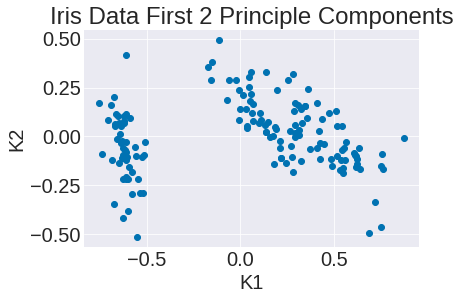

In [10]:
fig, ax = plt.subplots(1,1)
ax.scatter(iris_proj[:,0],iris_proj[:,1])
ax.set_title('Iris Data First 2 Principle Components')
ax.set_xlabel('K1')
ax.set_ylabel('K2')


### 1c) Dropping different pairs of principal components

- In the cell below, create a "high quality" 2x2 subplots grid of scatterplots that drops different consective PCs from the data, then project onto the remaining PCs.

The 2x2 plots should keep:
- (top-left) PCs [2, 3]
- (top-right) PCs [1, 2]
- (bottom-left) PCs [3, 0]
- (bottom-right) PCs [0, 1]

High quality means
- x and y axis label indicating the PC (e.g. PC1)
- title indicating the PCs shown in the plot

You may have to adjust the font/figure sizes to make things legiable.

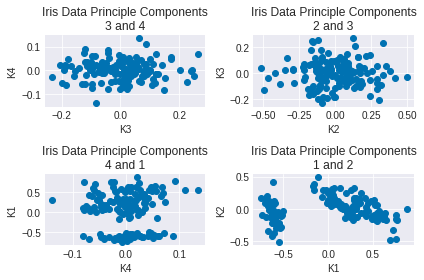

In [11]:
plt.rcParams.update({'font.size': 10})

k_graph_list = [[2,3],[1,2],[3,0],[0,1]]

fig, axs = plt.subplots(2,2)

for K_s, ax in zip(k_graph_list,np.ravel(axs)):
    Ks_to_plot = pca.pca_project(K_s)
    ax.scatter(Ks_to_plot[:,0],Ks_to_plot[:,1])
    ax.set_title(f'Iris Data Principle Components\n{K_s[0]+1} and {K_s[1]+1}')
    ax.set_xlabel(f'K{K_s[0]+1}')
    ax.set_ylabel(f'K{K_s[1]+1}')

fig.tight_layout()




**Question 2:** Interpret what the 2x2 grid of plots tells us about keeping different PCs.

**Question 2 answer:**

Tells some are useful together some are not

### 1e) Reconstruct data based on PCs

- In `pca_cov.py`, implement `pca_then_project_back`, which projects the data to PCA space, keeping only the top $k$ PCs, then projects from PCA space back onto the original data space.
- In the cell below, create a scatter plot of the two data variables `sepalLength` (x), `sepalWidth` (y) of the Iris data **without any normalization**.
- In the 2nd cell below, do PCA **on the normalized Iris data** and create a 2x2 grid of scatter plots showing the data reconstruction of the 1st two data variables (`sepalLength`, `sepalWidth` — *these are what your axis labels should be*) when keeping the top 1, 2, 3, or 4 (all) principal components.
    - If everything goes well, if you keep all 4 PCs you should get the original dataset back (it should match your 'sepalLength', 'sepalWidth' plot created one cell above — including the data range and center).

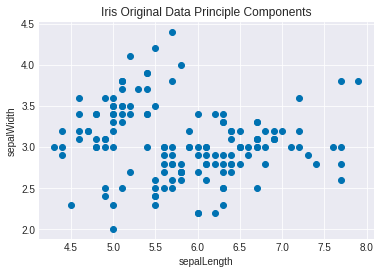

In [12]:
# Plot original iris data
fig, ax = plt.subplots(1,1)
ax.scatter(pca.data['sepalLength'],pca.data['sepalWidth'])
ax.set_title('Iris Original Data Principle Components')
ax.set_xlabel('sepalLength')
ax.set_ylabel('sepalWidth')
plt.show()

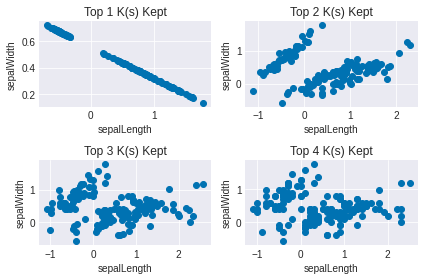

In [13]:
fig, axs = plt.subplots(2,2)
keep_top_k = 1
pca.pca(iris_headers, normalize=True)
# 2x2 grid of scatter plots
for grid_y in range(0,2):
    for grid_x in range(0,2):
        reconstructed_data =  pca.pca_then_project_back(keep_top_k)

        axs[grid_y,grid_x].scatter(reconstructed_data[:,0],reconstructed_data[:,1])
        axs[grid_y,grid_x].set_title(f'Top {keep_top_k} K(s) Kept')
        axs[grid_y,grid_x].set_xlabel('sepalLength')
        axs[grid_y,grid_x].set_ylabel('sepalWidth')

        keep_top_k += 1

fig.tight_layout()

**Question 3:** How well does each of the re-projections preserve properties of the original data? Briefly interpret what the above 2x2 grid means.

**Question 3 answer:**

They get more spread out past one K which makes sense ebcauser at you add principle components more variance is added

## Task 2: Eigenfaces. Perform PCA on face images

Here, you will implement the Eigenface algorithm, which involves performing PCA on images of human faces. Here is a link to original paper: https://sites.cs.ucsb.edu/~mturk/Papers/jcn.pdf

*Reference:* M. Turk; A. Pentland (1991). "Eigenfaces for recognition" (PDF). *Journal of Cognitive Neuroscience*. 3 (1): 71–86.

### 2a) Load in LFWcrop face dataset

Run the following cell to load in the face images and labels (which celebrity each face is of).

More info about LFWcrop face dataset: http://conradsanderson.id.au/lfwcrop/

In [14]:
face_imgs = np.load('data/lfwcrop.npy')
face_names = np.loadtxt('data/lfwcrop_ids.txt', dtype=str, delimiter='\n')

print(f'There are {len(face_imgs)} faces. There should be 13231.')
print(f'Shape of images is are {face_imgs.shape} faces. It should be (13231, 64, 64).')
print(f'Names of faces match the number of face images? {np.all(len(face_names) == len(face_imgs))}')

There are 13231 faces. There should be 13231.
Shape of images is are (13231, 64, 64) faces. It should be (13231, 64, 64).
Names of faces match the number of face images? True


### 2b) Look at the face data

- In the cell below, fill in the function to create a 5x5 subplots grid of plots. In each plot, show one of the first 25 images in the dataset. For the title of the plot, use the corresponding name of the celebrity whose face. For showing the image, use `imshow`: https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.imshow.html#matplotlib-pyplot-imshow
- Run the function to create the plot of the faces below.
- When you call `imshow`, add this optional parameter (otherwise faces look ghastly): `cmap=plt.get_cmap('gray')`
- Turn off the x and y ticks (they just add clutter).
- **Before moving on, make sure that the celebrity names match the image!**

In [15]:
def face_plot(face_imgs, face_names):
    '''Create a 5x5 grid of face images

    Parameters:
    -----------
    face_imgs: ndarray. shape=(N, img_y, img_x).
        Grayscale images to show.
    face_names: ndarray. shape=(N,).
        Names of the person in each image represented as strings.

    TODO:
    - Create a 5x5 grid of plots of a legible size
    - In each plot, show the grayscale image and make the title the person's name.
    '''
    fig, axs = plt.subplots(5,5, figsize = (15,15))

    for face_img, face_name, ax in zip(face_imgs,face_names,axs.flatten()):
        ax.imshow(face_img,cmap=plt.get_cmap('gray'))
        ax.set_title(face_name, fontsize = 15)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

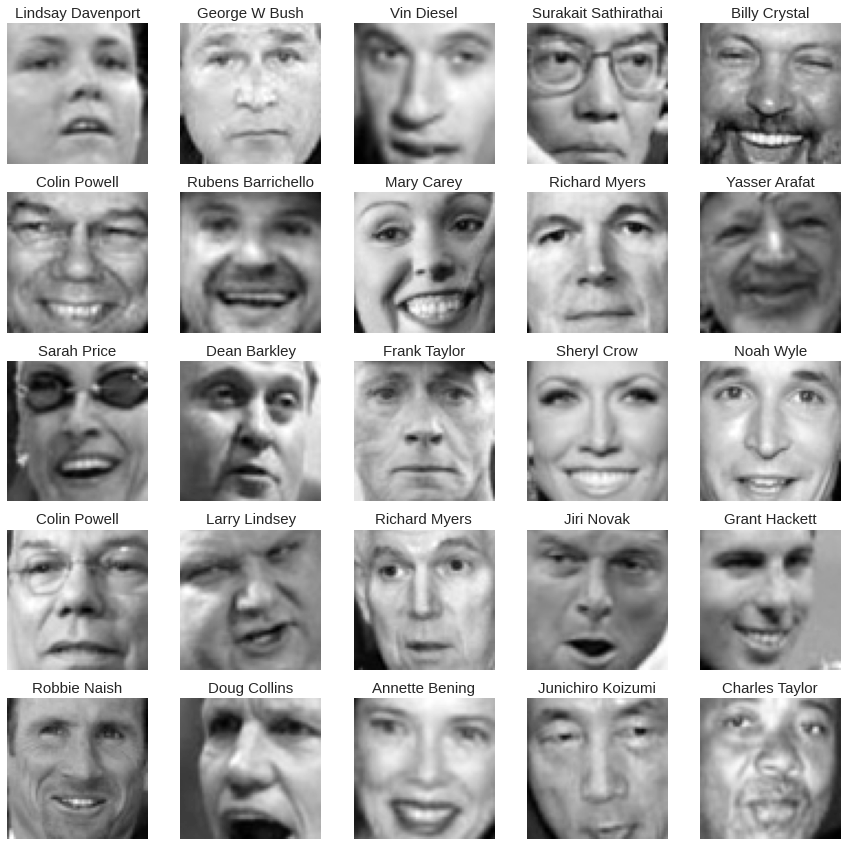

In [16]:
face_plot(face_imgs,face_names)

### 2c) Visualize the "mean face"

- Take the mean face image across the dataset and show it below.

NOTE: Use the same `cmap` parameter as above and turn off x and y tick marks.

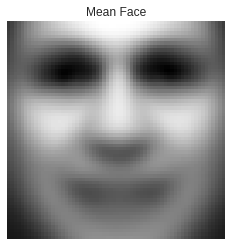

In [17]:
mean_face_plot = plt.imshow(face_imgs.mean(axis=0),cmap=plt.get_cmap('gray'))
mean_face_plot.axes.set_title(f'Mean Face')
mean_face_plot.axes.get_xaxis().set_visible(False)
mean_face_plot.axes.get_yaxis().set_visible(False)
plt.show()

**Question 4:** What does the "mean face" image represent?

**Question 4 answer:**
It shows all the genereal characteristics of a face (eyes noses mouth facial structure)

### 4d) Preprocess face data

In the face dataset, each person is a sample and each pixel is a variable. Currently, the face data has shape = `(13231, 64, 64)` or $N = 13231$ samples and $M = 64*64 = 4096$ pixels. To run PCA, we'll need to \"unravel\" each row of pixels and glue them into one big vector so that the shape = `(13231, 64*64)` = `(13231, 4096)`. This will make a standard matrix and should work with your PCA code.


- Reshape the face data to make this so. **Do NOT hard code ANY part of the (13231, 64*64)!**

In [18]:
face_imgs.shape

(13231, 64, 64)

In [19]:
# Your reshape code here
face_imgs_vec  = face_imgs.reshape(face_imgs.shape[0],face_imgs.shape[1]*face_imgs.shape[2])

print(f'Your reshaped face images have shape={face_imgs_vec.shape} and it should be (13231, 4096).')

Your reshaped face images have shape=(13231, 4096) and it should be (13231, 4096).


### 2e) Perform PCA on preprocessed face data

- Create pandas DataFrame object that holds the face data. The header names of consecutive integers `0, 1, ..., 4095` are fine.
- Create `PCA_COV` object that holds the face DataFrame.
- Run PCA. For `vars` pass in a Python list of ints (`0, 1, ..., 4095`).

NOTE: This is not a "toy" dataset so it might take a few minutes to finish computing.
- Use the python `time` module (i.e. `import time`) to time how long the `pca` method takes to finish processing the data, then print out the time elapsed below. If this takes more than a few minutes, something probably is wrong.

(I am going to use jupyter notebook built-in functions instead of time module)

In [20]:
face_df  = pd.DataFrame(face_imgs_vec)
face_pca = pca_cov.PCA_COV(face_df)

In [21]:
%timeit face_pca.pca(list(np.arange(4096)))

51.2 s ± 488 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### 2f) Make face PCA elbow plot

- Make an elbow plot of the PCA results.
- You should readily notice that it is challenging to see how many PCs are required before the curve plateaus. Update your plot below with a reasonable number of PCs to show in order to focus on the curve before it plateaus.

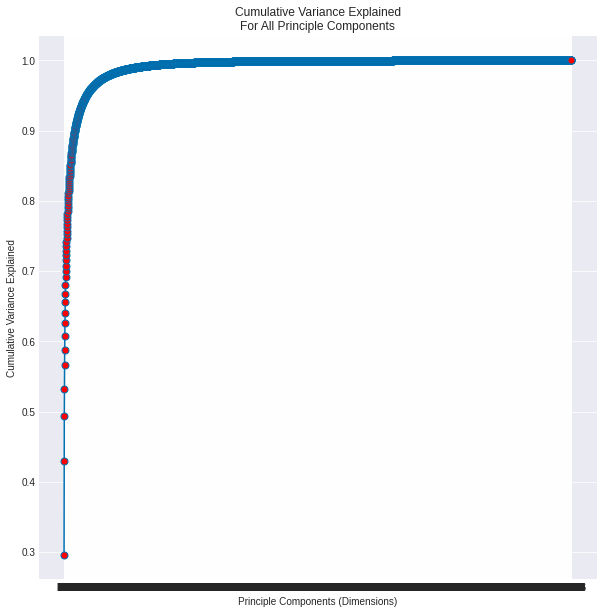

In [22]:
face_pca.elbow_plot()
plt.show()

From here it is obvious that only a few number of pixels contribute to the total variance of the facial
images so I am going to only show the top 50 k's to see how much variance they account for.

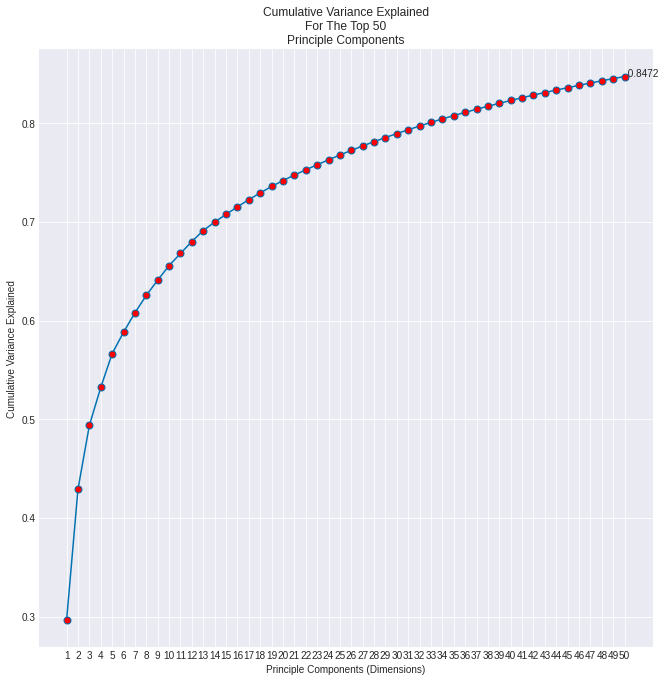

In [23]:
face_pca.elbow_plot(50, x_label_size= 8, show_just_numbers=True, figsize=(11,11), show_final_k_percentage=True)
plt.show()

As you can see this is much easier to how many priciple componets account for what cumulative proprtion
of the variance of the face images. However from looking at the elbow plot with all of the PCs it is clear that there are
still some PC's to be added before there are diminishing returns. To test for how many of the top PC's account for what
ammount of cummulative variance for the face images I wrote this function below that takes in the PCA_COV object
and also the cummulative variance to be shown

In [71]:
def show_elbow_for_percentage(pca,percentage,markersize='7',x_label_size = 8, figsize = (11,11),show_just_numbers = True, show_final_k_percentage = True):
    cummulative_variance = np.array(pca.get_cum_var())
    cummulative_variance_percentage = cummulative_variance[cummulative_variance <= percentage]
    pca.elbow_plot(cummulative_variance_percentage.size,markersize = markersize, x_label_size= x_label_size, show_just_numbers=show_just_numbers, figsize=figsize, show_final_k_percentage=show_final_k_percentage)
    plt.show()

Now I am going to see how many priciple componets account for 95% of the variance in the face images.

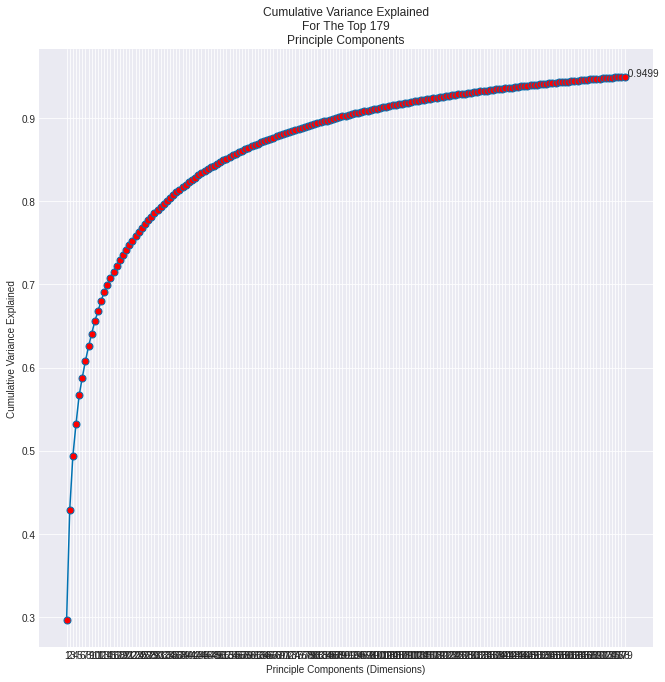

In [25]:
show_elbow_for_percentage(face_pca,0.95)

Now just to see how many more PCS are needed I am going to see how many PCS accouint for 99% of the variance

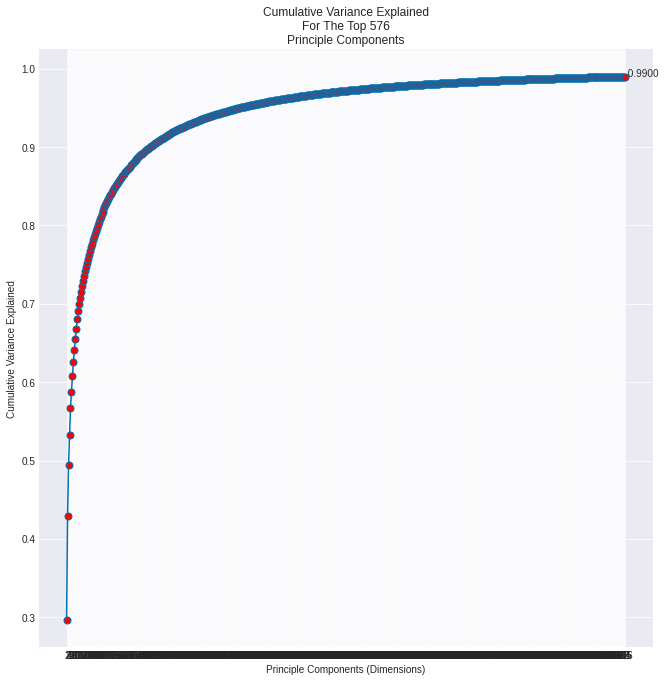

In [26]:
show_elbow_for_percentage(face_pca,0.99)

There is clearly a large ammount of diminishing returns when trying to account for all the PCs that contribute to 99% of the variance

### 2g) Reconstruct faces using the principal components

Use your elbow plot to find the number of top principal components required to *approximately* explain the following cumulative proportion of the variance:
- 50%
- 70%
- 80%
- 95%


- For each of the above number of PCs, project them back onto the original data space.
- Write then use the below `make_imgs` function to convert the projected data back to image shapes `(13231, 64, 64)`.
- Use `face_plot` to plot the reconstructed faces for each of the variance numbers above.

**There should be 4 5x5 plots below**

I have already happened to have found the number of PCs that accout for approximtly 95% of the variance
(which is the top 179 PCs) so I will use the function I created earlier show_elbow_for_percentage() to
find how many PC's account for 50% , 70%, and 80%

Showing Elbow Graph for 50% Cummulative Variance


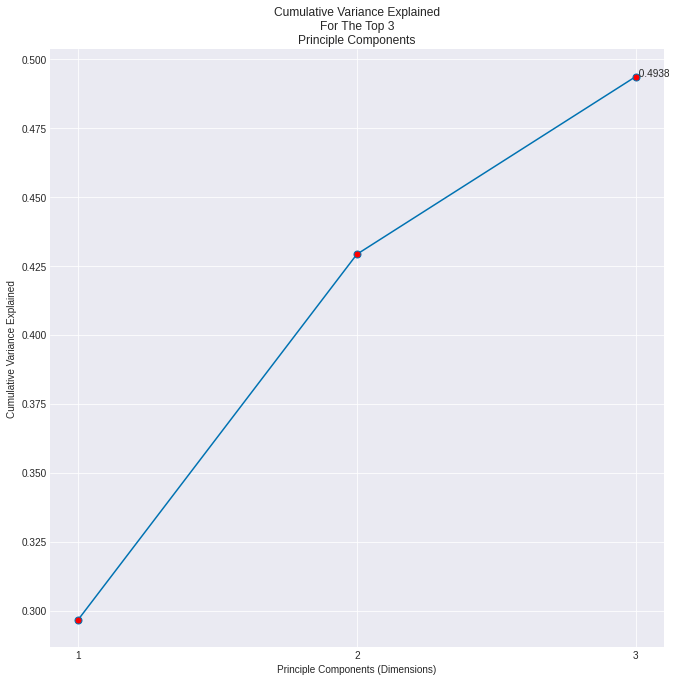

In [27]:
print("Showing Elbow Graph for 50% Cummulative Variance")
show_elbow_for_percentage(face_pca,0.50)


Showing Elbow Graph for 70% Cummulative Variance


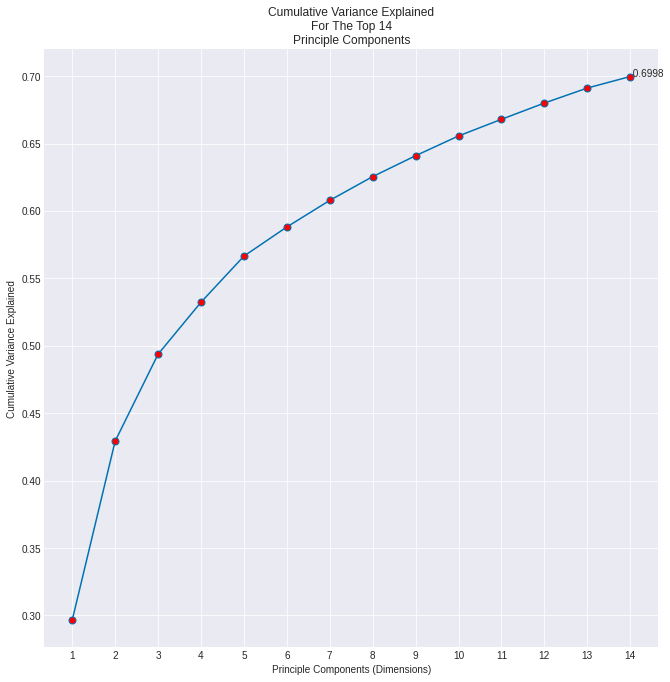

In [28]:
print("Showing Elbow Graph for 70% Cummulative Variance")
show_elbow_for_percentage(face_pca,0.70)

Showing Elbow Graph for 80% Cummulative Variance


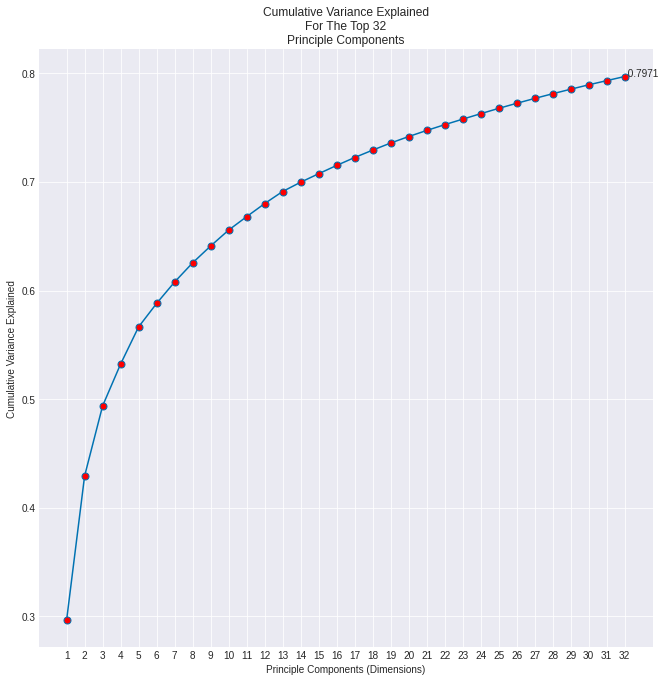

In [72]:
print("Showing Elbow Graph for 80% Cummulative Variance")
show_elbow_for_percentage(face_pca,0.80)

Showing Elbow Graph for 95% Cummulative Variance


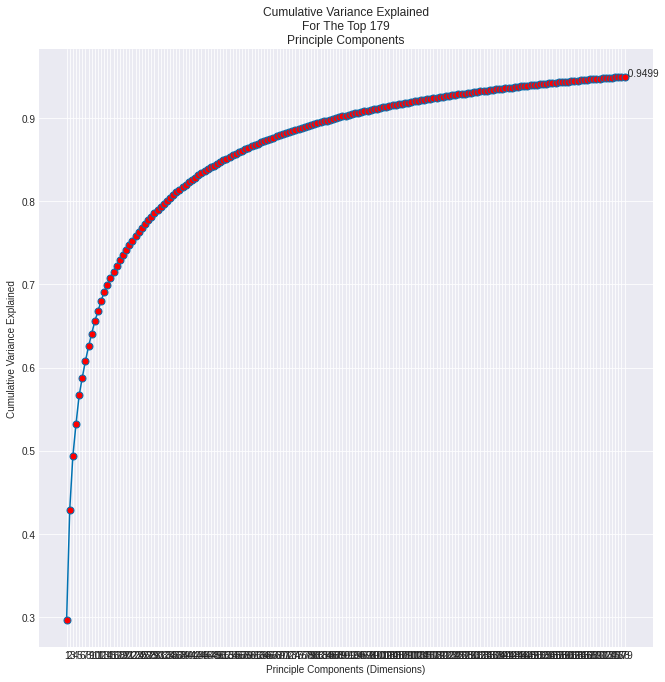

In [75]:
print("Showing Elbow Graph for 95% Cummulative Variance")
show_elbow_for_percentage(face_pca,0.95, x_label_size = 0.1)

From the elbow plots above I can see that the top 3 PCs account for just under 50% of the variance,
the top 14 PCs account for just under 70% of the variance, the top 32 PCs account for just under 80% of the variance,
and as I said earlier the top 179 PCs account for just under 95% of the variance


Now I am going to show the reconstructed picture for projection of the four different number of top PC's for the projection of the images

In [31]:
def make_imgs(reconstucted_imgs, original_imgs):
    '''Inflates a 1D feature vector representation of images into 2D images for plotting.
    Assumes square images

    Parameters:
    -----------
    reconstucted_imgs: ndarray. shape=(N, img_y*img_x)
        1D vector representation of each image

    original_imgs: ndarray. shape=(N, img_y, img_x)
        These are the original images that the reconstructed images should
        be the shape of.
    Returns:
    -----------
    ndarray. shape=(N, img_y, img_x)
        The images inflated into 2D
    '''
    return reconstucted_imgs.reshape(original_imgs.shape[0],original_imgs.shape[1],original_imgs.shape[2])

#### 50% variance face grid
(top 3 PC's)

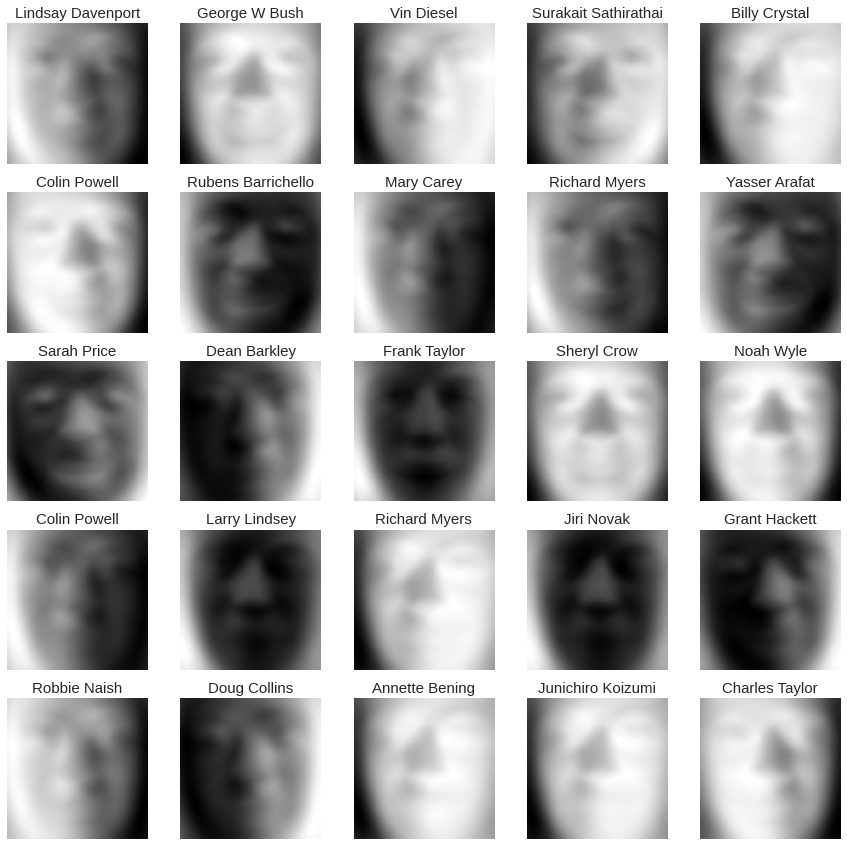

In [32]:
reconstucted_imgs_50p =  face_pca.pca_then_project_back(3)
reconstucted_imgs_50p = make_imgs(reconstucted_imgs_50p,face_imgs)
face_plot(reconstucted_imgs_50p,face_names)

#### 70% variance face grid
(top 14 PC's)

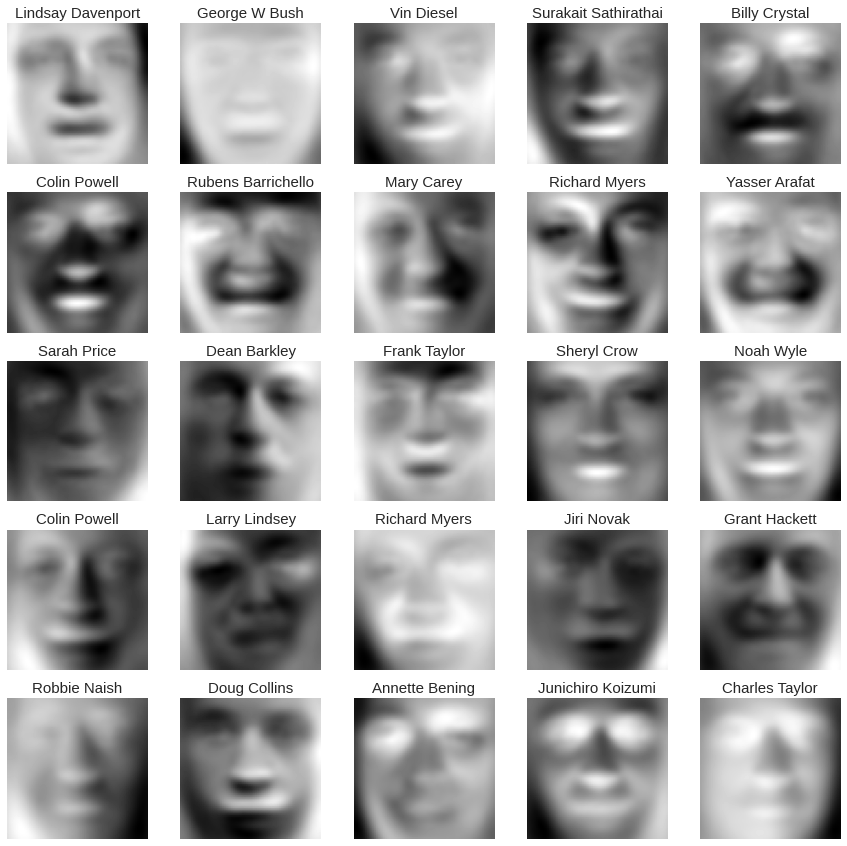

In [33]:
reconstucted_imgs_70p =  face_pca.pca_then_project_back(14)
reconstucted_imgs_70p = make_imgs(reconstucted_imgs_70p,face_imgs)
face_plot(reconstucted_imgs_70p,face_names)


#### 80% variance face grid
(top 32 PC's)

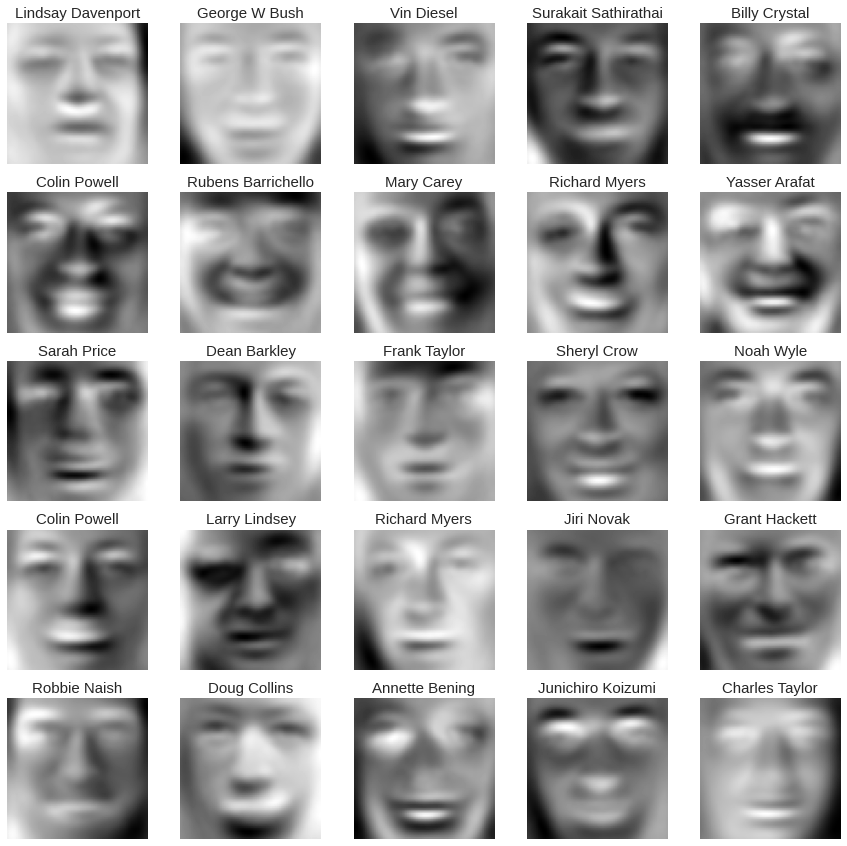

In [34]:
reconstucted_imgs_80p =  face_pca.pca_then_project_back(32)
reconstucted_imgs_80p = make_imgs(reconstucted_imgs_80p,face_imgs)
face_plot(reconstucted_imgs_80p,face_names)


#### 95% variance face grid
(top 179 PC's)

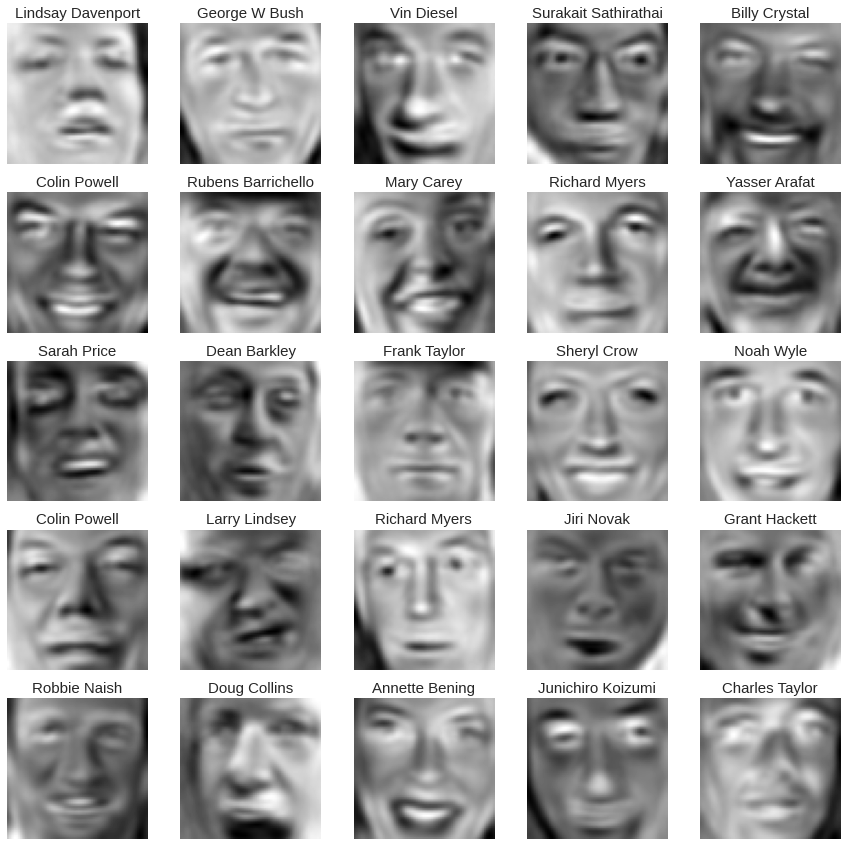

In [35]:
reconstucted_imgs_95p =  face_pca.pca_then_project_back(179)
reconstucted_imgs_95p = make_imgs(reconstucted_imgs_95p,face_imgs)
face_plot(reconstucted_imgs_95p,face_names)


**Question 5:** Briefly interpret the face reconstruction with the above choices of proportion variance explained.

**Question 5 answer:**
It keeps adding more detailed as expected and they seem to have enough variance for a computer to tell the difference with
around 70% (will test this later on) but for me to disguingish the faces well I need at least 95% of the varriance shown
(which is still significlantly less pixels than the original ammount 179 pixels as comparred to 4069) which can make computing and
the data much quicker and more memory efficient

## Extensions

To receive credit for any extension, you must:
- Not modify / prevent any code from the core project from working (e.g. make a copy before changing). In other words, **the notebook test code should still work!**
- **You must describe what you did and what you found in detail**. This includes a summary of parameter values used in your simulations.
- Include (*labeled!*) plots and/or numbers to present your results.
- Write up your extensions below or in a separate notebook.

**Rule of thumb: one deep, thorough extension is worth more than several quick, shallow extensions!**

**Reminder:** Give credit to all sources, including anyone that you consulted.

**Note about CSV files:** Please try if at all possible to use pandas `read_csv` method with the URL argument in your submitted notebook extensions (should be possible if you downloaded your CSV file off the internet). This way, graders will be able to download the same data and you won't have to remember to copy over the CSV file with your project submission (this is welcome too). Remember the 10MB rule though for filer submissions.

### 1. Your own dataset

- Do PCA on a dataset of your choice. Use any of the canonical analysis tools (e.g. elbow plot, proportion variance explained, etc) to inform your analysis and exploration.

### 2. Image compression

- Run PCA on your own images and analyze the trade-off in compression and reconstruction error.

### 3. Facial recognition with Eigenfaces

You can use Eigenfaces to perform facial recognition! Here is the idea:

1. Perform PCA on images of faces of people who you would like to be able to "learn" to recognize (creating a "database" of known faces). This is just like what you did in the main project.
2. Project a "query" image of a face that you would like to recognize into the PCA space established by the database of known faces (the number of PCA dimensions is up to you).
3. Project each of the images in the face database into the same PCA space established by the database of known faces (the number of PCA dimensions is the same as before).
4. Treat the projected query image and each projected database images as vectors. Compute the Euclidean distance of the vector obtained by subtracting that of the query image and that of each database image.
5. Pick a match tolerance level. If any of the distances is less than your tolerance level, you have a match! If none of the distances is smaller than your tolerance, you don't have a match.

All of these functions and analysis were created and done in Eigenface_rec.py

In [36]:
def plot_img(ax, image_array, title = ''):

    if len(image_array.shape) == 2:
        img_plot = ax.imshow(image_array,cmap=plt.get_cmap('gray'))
        # img_plot = ax.imshow(image_array)
    elif len(image_array.shape) == 3:
        img_plot = ax.imshow(image_array)

    ax.set_title(title)
    ax.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    return ax

def distance_between_images(img_1, img_2):

    img_1 = img_1.reshape(1, img_1.size)
    img_2 = img_2.reshape(1, img_2.size)
    image_dist = np.sqrt(np.sum((img_1 - img_2) * (img_1 - img_2), axis=1))
    return image_dist[0]



def vectorize_images(images_data):

    images_data_vec = images_data.reshape(images_data.shape[0], images_data.shape[1]*images_data.shape[2])
    return images_data_vec



def plot_img(ax, image_array, title = ''):

    if len(image_array.shape) == 2:
        img_plot = ax.imshow(image_array,cmap=plt.get_cmap('gray'))
        # img_plot = ax.imshow(image_array)
    elif len(image_array.shape) == 3:
        img_plot = ax.imshow(image_array)

    ax.set_title(title)
    ax.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    return ax

def distance_between_images(img_1, img_2):

    img_1 = img_1.reshape(1, img_1.size)
    img_2 = img_2.reshape(1, img_2.size)
    image_dist = np.sqrt(np.sum((img_1 - img_2) * (img_1 - img_2), axis=1))
    return image_dist[0]



def vectorize_images(images_data):

    images_data_vec = images_data.reshape(images_data.shape[0], images_data.shape[1]*images_data.shape[2])
    return images_data_vec



def match_photo(known_data, known_data_labels, querry_data, num_top_pcs = 32, threshold=0.70,normalization = False, vectorize_image_data = True, get_certian_distances = None):

   if vectorize_image_data:
       known_data = vectorize_images(known_data)
       querry_data = querry_data.reshape(1, querry_data.shape[0]*querry_data.shape[1])

   known_df = pd.DataFrame(known_data)
   known_pca = pca_cov.PCA_COV(known_df)
   known_pca.pca(np.arange(known_df.shape[1]), normalize=normalization)
   known_pca_projections = known_pca.pca_project(np.arange(num_top_pcs))

   # set up querry_image for projection into PCA space
   querry_data = querry_data - known_pca.get_A_mean()
   if normalization:
       querry_data = known_pca.normalize_separately(querry_data)

   P_hat = known_pca.get_eigenvectors()[:, :num_top_pcs]
   querry_img_projection = querry_data @ P_hat


   distance_array = []

   # computing distance between querry image projection and projected known images
   # Will return at the first image that meets the thresh hold
   for img_index , zipped_vals in enumerate(zip(known_data_labels,known_pca_projections)):
       known_name, known_projection = zipped_vals
       image_distance = abs(distance_between_images(known_projection, querry_img_projection))

       if not isinstance(get_certian_distances, type(None)):
           if known_name == get_certian_distances:
               distance_array.append([image_distance,img_index])

       if image_distance < threshold:
           return known_name, distance_array

   distance_array = np.array(distance_array)
   return None, distance_array

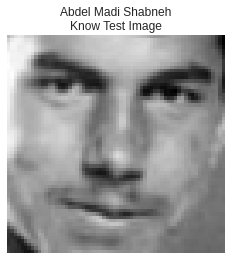

In [37]:
#showing image I am testing which is from the know dataset
test_know_face_img = face_imgs[12344]
test_know_face_name = face_names[12344]

fig, axes = plt.subplots(1,1)
axes = plot_img(axes,test_know_face_img, f'{test_know_face_name}\nKnow Test Image')
plt.show()


In [38]:
test_match_result = match_photo(known_data=face_imgs, known_data_labels=face_names,
            querry_data=test_know_face_img, num_top_pcs=3)

print(f'{test_match_result[0]}')


Abdel Madi Shabneh


I noticed that there are repeating different photos of the same people in the data set so now I am going to set up a Pandas dataframe for the know images and see what phots of
different people make up the most images in the data set.

In [39]:
# make the dataframe
know_faces_df = pd.DataFrame(vectorize_images(face_imgs))
know_faces_df.insert(0,'Image Name', face_names)
know_faces_df

,Image Name,0,1,2,3,4,5,6,7,8,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,Lindsay Davenport,177.0,180.0,185.0,189.0,191.0,188.0,183.0,181.0,181.0,...,146.0,150.0,135.0,115.0,95.0,84.0,88.0,91.0,88.0,89.0
1,George W Bush,143.0,138.0,140.0,149.0,171.0,182.0,177.0,177.0,186.0,...,139.0,118.0,66.0,14.0,10.0,20.0,17.0,13.0,16.0,19.0
2,Vin Diesel,47.0,47.0,54.0,59.0,65.0,72.0,77.0,80.0,87.0,...,120.0,113.0,112.0,111.0,110.0,109.0,107.0,105.0,102.0,98.0
3,Surakait Sathirathai,123.0,122.0,123.0,124.0,121.0,115.0,113.0,113.0,112.0,...,66.0,67.0,63.0,62.0,60.0,63.0,66.0,59.0,44.0,37.0
4,Billy Crystal,85.0,99.0,108.0,108.0,105.0,106.0,115.0,130.0,138.0,...,91.0,103.0,147.0,128.0,123.0,119.0,111.0,109.0,103.0,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13226,Mike Krzyzewski,113.0,109.0,108.0,112.0,114.0,122.0,131.0,143.0,150.0,...,132.0,134.0,134.0,132.0,124.0,68.0,24.0,10.0,8.0,7.0
13227,Jiri Novak,111.0,110.0,117.0,126.0,137.0,147.0,155.0,167.0,181.0,...,86.0,82.0,84.0,94.0,97.0,77.0,44.0,28.0,35.0,39.0
13228,Claudine Farrell,46.0,51.0,63.0,78.0,90.0,105.0,132.0,125.0,95.0,...,120.0,116.0,111.0,109.0,112.0,117.0,119.0,117.0,115.0,101.0
13229,Amelie Mauresmo,127.0,88.0,70.0,95.0,129.0,147.0,157.0,168.0,170.0,...,37.0,35.0,36.0,37.0,38.0,41.0,44.0,47.0,52.0,50.0


In [40]:
# find the count of each photo
know_faces_df['Image Name'].value_counts()


George W Bush              530
Colin Powell               236
Tony Blair                 144
Donald Rumsfeld            121
Gerhard Schroeder          109
                          ... 
Steve Fehr                   1
Mufti Mohammad Syed          1
Daniel Patrick Moynihan      1
Marcelo Bielsa               1
Richard Jefferson            1
Name: Image Name, Length: 5749, dtype: int64

From looking at the counts of all the names of the images in the data set it is clear that George W
Bush comes up the most in the know dataset so he will be best to use to test for a photo not in the data set

Now I am going to test a photo of George W Bush I found online to see how this match_photo funchtion works with a photo that
is not form the known dataset. (I also chose George W bush because there are many picture of him avalible)

Here is the photo I have found of him that is not cropped to the proper face and image size (as according to the paper on eigenfaces)


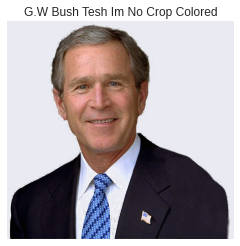

In [41]:
gw_test_im = plt.imread('data/gw_test_nocrop.png')
fig, axes = plt.subplots(1,1)
axes = plot_img(axes,gw_test_im,f'G.W Bush Tesh Im No Crop Colored')
plt.show()


Now I am going to crop the face to the proper size and grey scale it.

Also, When reading I learned of a better module to work with images from a fork called Pillow

To install youy will need Mac os or Linux and then use pip install Pillow (might need homebrew if on Mac)

In [42]:
# # WITH PILLOW
#
#
# import PIL as pil
# # The convert.('LA') converts the image to a greyscale
# gw_img = pil.Image.open('data/gw_test_nocrop.png').convert('LA')
# # gw_img.show()
#
#
# #cropping just the face image to a 170 by 170 photo then will scale down
# gw_face_crop = gw_img.crop((122,101,292,271))
# gw_face_crop.show()



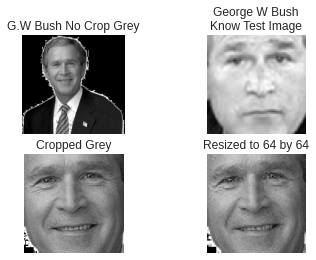

In [43]:

# WITH OPEN CV
test_know_GWB_face_img = face_imgs[1]
test_know_GWB_face_name = face_names[1]
import cv2

# 0 in imread makes it grey scale
gw_img_cv = cv2.imread('data/gw_test_nocrop.png',0)
gw_img_cv_face_crop = gw_img_cv[104:258,130:285]

gw_resized = cv2.resize(gw_img_cv_face_crop, dsize=(64, 64), interpolation=cv2.INTER_CUBIC)

fig, axes = plt.subplots(2,2)
axes[0,0] = plot_img(axes[0,0],gw_img_cv,f'G.W Bush No Crop Grey')
axes[1,0] = plot_img(axes[1,0],gw_img_cv_face_crop,f'Cropped Grey')
axes[0,1] = plot_img(axes[0,1],test_know_GWB_face_img, f'{test_know_GWB_face_name}\nKnow Test Image')
axes[1,1] = plot_img(axes[1,1],gw_resized, f'Resized to 64 by 64')
plt.show()
# res = cv2.resize(img, dsize=(54, 140), interpolation=cv2.INTER_CUBIC)





Since there are so many photos of GWB in the data set I am going to look ath the mean face for all of his photos

In [44]:
#making a data frame for just his images
GWB_df = know_faces_df.loc[know_faces_df['Image Name'] == 'George W Bush']
GWB_df

,Image Name,0,1,2,3,4,5,6,7,8,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
1,George W Bush,143.0,138.0,140.0,149.0,171.0,182.0,177.0,177.0,186.0,...,139.0,118.0,66.0,14.0,10.0,20.0,17.0,13.0,16.0,19.0
26,George W Bush,111.0,114.0,120.0,124.0,121.0,116.0,119.0,126.0,131.0,...,18.0,21.0,25.0,33.0,54.0,67.0,70.0,70.0,68.0,67.0
87,George W Bush,155.0,159.0,161.0,162.0,161.0,156.0,155.0,157.0,159.0,...,149.0,148.0,148.0,149.0,145.0,119.0,83.0,54.0,40.0,47.0
96,George W Bush,157.0,151.0,148.0,152.0,176.0,184.0,185.0,187.0,184.0,...,121.0,120.0,114.0,111.0,115.0,119.0,121.0,119.0,117.0,117.0
100,George W Bush,110.0,113.0,126.0,138.0,142.0,141.0,140.0,139.0,136.0,...,183.0,189.0,193.0,194.0,194.0,192.0,187.0,180.0,171.0,164.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13099,George W Bush,70.0,72.0,73.0,73.0,73.0,74.0,75.0,76.0,79.0,...,126.0,119.0,114.0,110.0,108.0,112.0,115.0,117.0,117.0,117.0
13101,George W Bush,46.0,47.0,55.0,62.0,65.0,77.0,90.0,102.0,110.0,...,89.0,94.0,102.0,108.0,113.0,108.0,96.0,82.0,70.0,62.0
13137,George W Bush,119.0,114.0,116.0,122.0,125.0,127.0,127.0,126.0,126.0,...,46.0,38.0,18.0,6.0,3.0,2.0,2.0,4.0,16.0,31.0
13189,George W Bush,57.0,50.0,41.0,32.0,25.0,16.0,14.0,22.0,39.0,...,164.0,156.0,151.0,145.0,140.0,132.0,125.0,120.0,116.0,114.0


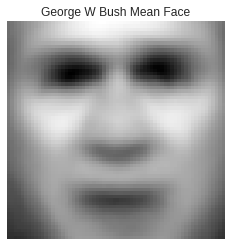

In [45]:
#show the mean face
fig, axes = plt.subplots(1,1)
gwb_mean_face = GWB_df.mean(axis=0)
gwb_mean_face = gwb_mean_face.values
# make the vectorizedf pixel values back into proper image shape
gwb_mean_face = gwb_mean_face.reshape(64,64)
plot_img(axes,gwb_mean_face, 'George W Bush Mean Face')
plt.show()

Now that I have the mean face og GWB I also wanted to be able to see a random choice of 25 of his photos in the know photo set so I wrote this code below
using the face_plots() function that I created earlier

In [46]:
GWB_df.select_dtypes('number').values

array([[143., 138., 140., ...,  13.,  16.,  19.],
       [111., 114., 120., ...,  70.,  68.,  67.],
       [155., 159., 161., ...,  54.,  40.,  47.],
       ...,
       [119., 114., 116., ...,   4.,  16.,  31.],
       [ 57.,  50.,  41., ..., 120., 116., 114.],
       [ 86.,  88.,  90., ..., 120., 119., 118.]])

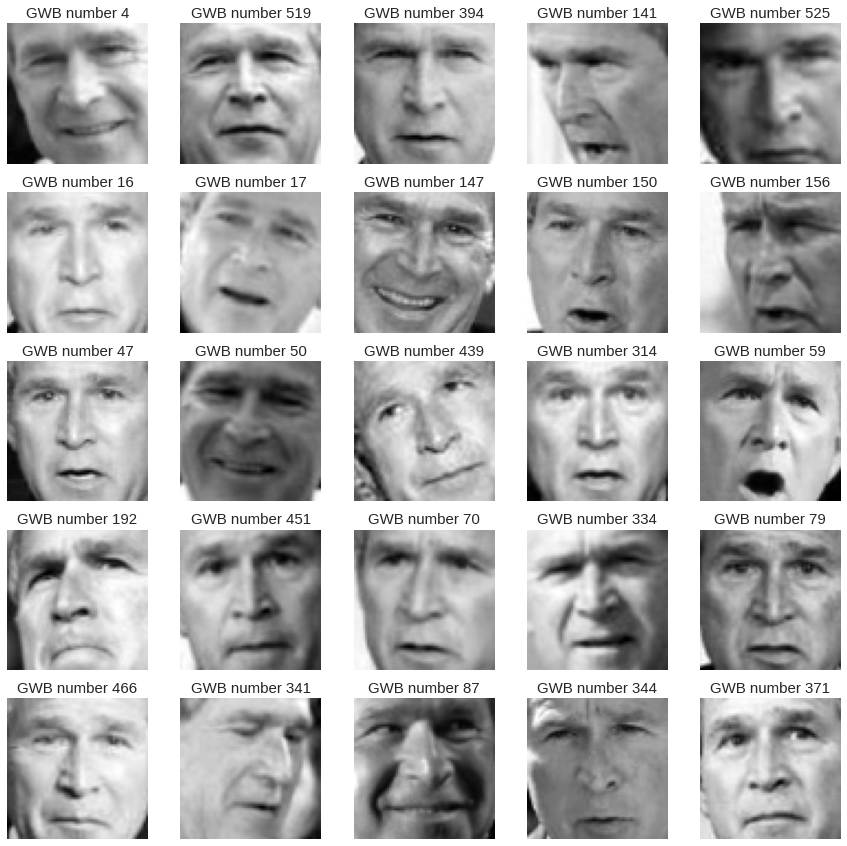

In [47]:
import random
# using a set to get unique random numbers in range of  gwb_df sample size
randomGWB_imgs = set()
while len(randomGWB_imgs) < 25:
    randomGWB_imgs.add(random.randint(0, GWB_df.shape[0]-1))

selected_rand_gwb_imgs = GWB_df.select_dtypes('number').values
selected_rand_gwb_imgs = selected_rand_gwb_imgs[list(randomGWB_imgs),:]

#reshape data
selected_rand_gwb_imgs = selected_rand_gwb_imgs.reshape(selected_rand_gwb_imgs.shape[0],64,64)
#make the 5,5 plot
face_plot(selected_rand_gwb_imgs, [f'GWB number {num}' for num in randomGWB_imgs])

In [48]:
test_match_result_GWB = match_photo(known_data=face_imgs, known_data_labels=face_names,
            querry_data=gw_resized, num_top_pcs=3, threshold= 0.7,normalization= True)

print(f'{test_match_result_GWB[0]}')


None


I am Still Struggling to find a match with the picture that I found online of George W Bush however when looking very closly at
the distance of my found GWB face compared to the ones in the data set it definitly does have a
very close relationship with the distances being the smallest however it just is not hitting the thresh hold. So my first thought was to raise the threshold
above 1 (which I am not sure is appropriate to do honestly).

In [49]:
test_match_result_GWB_thresh_2 = match_photo(known_data=face_imgs, known_data_labels=face_names,
            querry_data=gw_resized, num_top_pcs=3, threshold= 2,get_certian_distances = 'George W Bush')

print(f'{test_match_result_GWB_thresh_2[0]}')


None


This still did not work so I wanted to get an idea of what the first 25 PC's actually represented in a face of
GWB. To decide at exactly which photo of GWB to use I looked at the photo in the known data set that had the closest distance whith my cropped photo

In [50]:
print(np.where(test_match_result_GWB_thresh_2[1] == test_match_result_GWB_thresh_2[1][:,0].min()))

(array([444]), array([0]))


From here I see that the entry is the 444 photo in that distance array however that index does
not correspond with the postion in the know image array so I added an enumerate to my loop in
the match photo function and held the distance and index of the image in the know data set
as a 2d matrix (updated code above to work for updated method as well)

Once I did that I wrote this code below to display all of the pcs of the known face dataset


First 25 PCs of the Know Faces


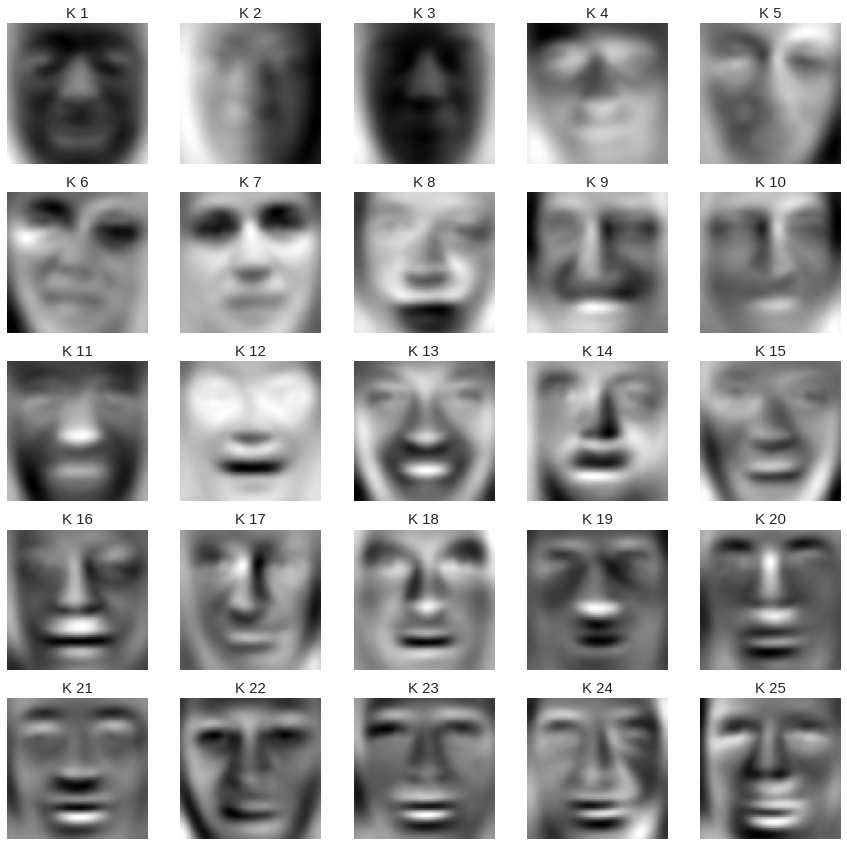

In [61]:
face_pca.get_eigenvectors().shape

face_e_vecs2D = np.reshape(face_pca.get_eigenvectors().T, [face_pca.get_eigenvectors().shape[0], 64, 64])


print('First 25 PCs of the Know Faces')
face_plot(face_e_vecs2D[:25], [f'K {i+1}' for i in range(0,25)])

Even tho the first PC is really the mean face I am getting desperate so I am going to see if I can get a facial match when just projecting the first PC

In [62]:
test_match_result_GWB_k_1 = match_photo(known_data=face_imgs, known_data_labels=face_names,
            querry_data=gw_resized, num_top_pcs=1, threshold= 0.9,get_certian_distances = 'George W Bush')

print(f'{test_match_result_GWB_k_1[0]}')

Bak Chang-Ryun


This makes sense that it would match with the wrong face because the first principle component is pretty much the mean face
So my first idea was to look at the distance array that is also returned and see what the maximum and smallest distance are to see if changing the threshhold
will help the accuracy in this case however when looking at iit in the debugger this was not the case so instead I am going to try using just the photos of GWB as the know image data set.

First I am going to make an elbow plot for all the PC's of just the GWB photos

In [65]:
gwb_pca = pca_cov.PCA_COV(GWB_df)
gwb_pca.pca(list(np.arange(4096)))

/home/matt/Colby/cs251/ProjectsVenv/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/matt/Colby/cs251/ProjectsVenv/lib/python3.8/site-packages/matplotlib/text.py:1348: ComplexWarning: Casting complex values to real discards the imaginary part
  y = float(self.convert_yunits(y))
/home/matt/Colby/cs251/ProjectsVenv/lib/python3.8/site-packages/matplotlib/text.py:825: ComplexWarning: Casting complex values to real discards the imaginary part
  y = float(self.convert_yunits(self._y))
/home/matt/Colby/cs251/ProjectsVenv/lib/python3.8/site-packages/matplotlib/text.py:687: ComplexWarning: Casting complex values to real discards the imaginary part
  posy = float(textobj.convert_yunits(textobj._y))


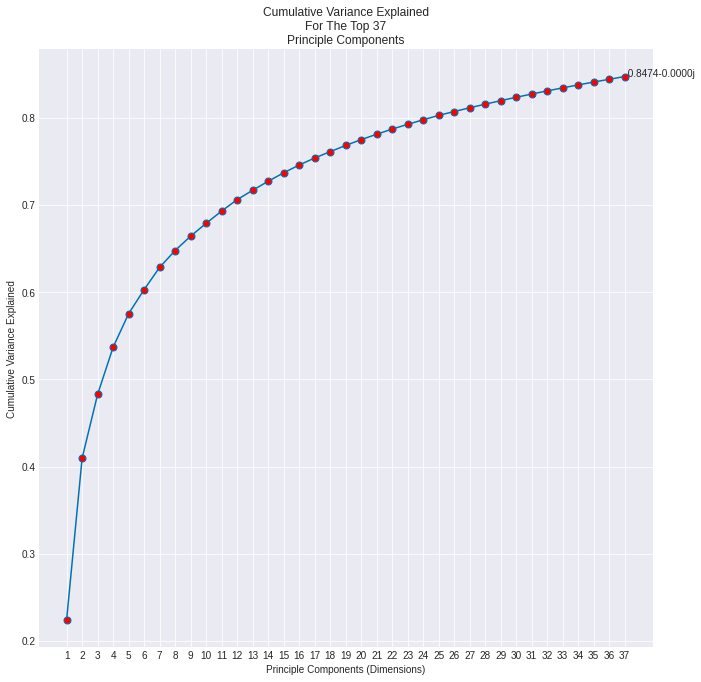

In [76]:
show_elbow_for_percentage(gwb_pca,0.85)
plt.show()

Now I am going to try the facial rec with that dataset and the top 37 PCs at first.

In [77]:
# Setting up the GWB images for the match photo function.

gwb_imgs_reshaped = GWB_df.select_dtypes('number').values
gwb_imgs_reshaped = gwb_imgs_reshaped.reshape(gwb_imgs_reshaped.shape[0], 64,64)

In [79]:
match_result_GWB_data_set_k_37_thresh_0_9 = match_photo(known_data=gwb_imgs_reshaped, known_data_labels=['George W Bush' for i in range(0,gwb_imgs_reshaped.shape[0])],
            querry_data=gw_resized, num_top_pcs=37, threshold= 0.9,get_certian_distances = 'George W Bush')

print(f'{match_result_GWB_data_set_k_37_thresh_0_9[0]}')


None


Clearly with this limited face data set it is very hard to have matches with photos outside the dataset unless there are
a lot more samples for each perosn in the dataset. I though of many ways t caputure this data including vido capture but my computer
can not process all that data without over heatting so instead I searched for a face data set online.

Here I am playing around with video capture

In [51]:
# captureMac = cv2.VideoCapture(0)
#
# # while True:
# #     ret,frame = captureMac.read()
# #
# #     cv2.imshow('frame', frame)
# #     if cv2.waitKey(1) == ord('q'):
# #         break
# captureMac.release()
# cv2.destroyWindow()

In [52]:
# import nltk
# nltk.download()
# from nltk.corpus import stopwords
# stop_words = set(stopwords.words('english'))
# print(len(stop_words))